In [1]:
import pandas as pd

In [2]:
import datetime as dt

In [3]:
import matplotlib.pyplot as plt

In [4]:
MousAquitaine=pd.read_csv('Data/MousAqui20.csv')

In [5]:
MousPACA=pd.read_csv('Data/MousPACA20.csv')

In [6]:
MousIDF=pd.read_csv('Data/MousIDF20.csv')

In [7]:
MousRA=pd.read_csv('Data/MousRA20.csv')

In [8]:
MousOcci=pd.read_csv('Data/MousOcci20.csv')

In [9]:
Moustiques20=pd.merge(MousOcci,MousRA, on='Semaine')

In [10]:
Moustiques20=pd.merge(Moustiques20,MousPACA, on='Semaine')

In [11]:
Moustiques20=pd.merge(Moustiques20,MousIDF, on='Semaine')

In [12]:
Moustiques20=pd.merge(Moustiques20,MousAquitaine, on='Semaine')

In [13]:
Moustiques20.rename(columns={'Semaine': 'Date'}, inplace=True)
Moustiques20.columns

Index(['Date', 'Occitanie', 'Rhone-Alpes', 'Provence-Alpes-Cote d'Azur',
       'Ile-de-France', 'Aquitaine'],
      dtype='object')

In [14]:
Moustiques20['Date'].apply(lambda x: x.replace('-',' ').replace(' ',' ')).astype('datetime64')

0     2020-01-05
1     2020-01-12
2     2020-01-19
3     2020-01-26
4     2020-02-02
         ...    
99    2021-11-28
100   2021-12-05
101   2021-12-12
102   2021-12-19
103   2021-12-26
Name: Date, Length: 104, dtype: datetime64[ns]

In [15]:
#Moustiques20['Date']=pd.DatetimeIndex(Moustiques20['Date']).month

In [16]:
Moustiques20= Moustiques20.groupby('Date').sum()

Text(0, 0.5, 'Mesures')

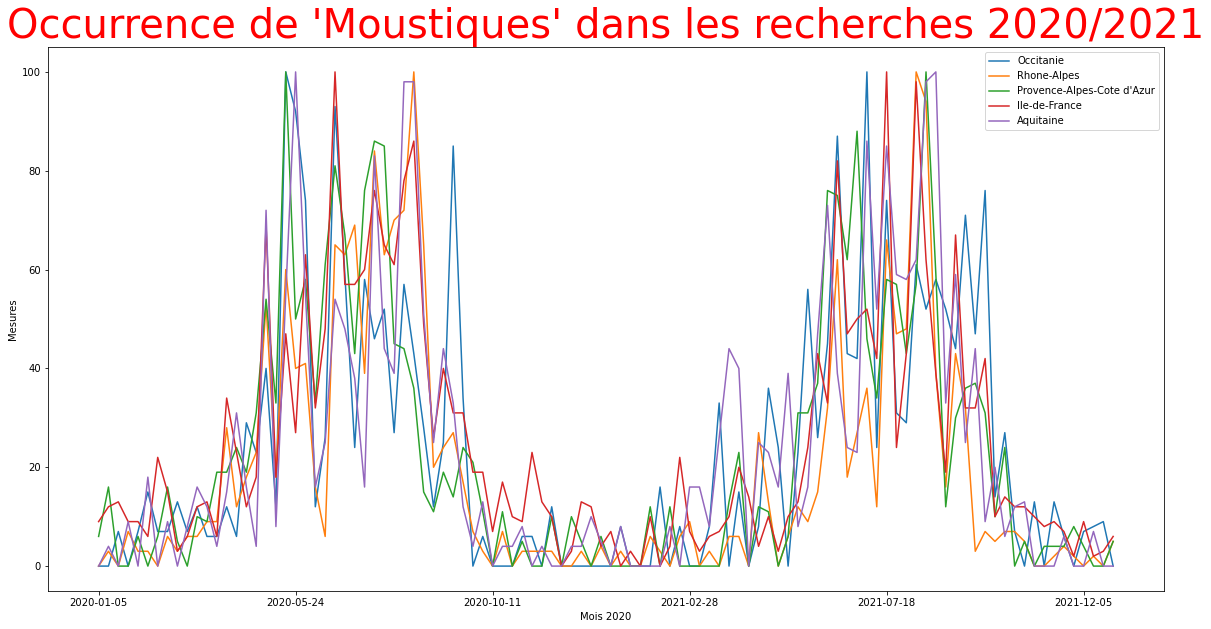

In [17]:
ax=Moustiques20.plot(figsize=(20,10))
plt.title(label="Occurrence de 'Moustiques' dans les recherches 2020/2021",
          fontsize=40,
          color="RED")
plt.xlabel('Mois 2020')
plt.ylabel('Mesures')

In [18]:
Moustiques20

,Occitanie,Rhone-Alpes,Provence-Alpes-Cote d'Azur,Ile-de-France,Aquitaine
Date,,,,,
2020-01-05,0,0,6,9,0
2020-01-12,0,3,16,12,4
2020-01-19,7,0,0,13,0
2020-01-26,0,7,0,9,9
2020-02-02,7,3,6,9,0
...,...,...,...,...,...
2021-11-28,0,2,8,2,0
2021-12-05,7,0,4,9,0
2021-12-12,8,2,0,2,7


In [19]:
#Mousti20=Moustiques20.to_csv(index=False)

In [20]:
#Mousti20

In [21]:
#from pathlib import Path
#import os
#filepath=Path('OndeDrive/Bureau/Prediction2022/Data/Mousti20.csv')
#filepath.parent.mkdir(parents=True, exist_ok=True)
#Moustiques20.to_csv(filepath)

In [22]:
#pd.melt(Moustiques20,id_vars=[""], 
        #value_vars="Moustiques: (Languedoc-Roussillon)")

In [23]:
#Moustiques20.columns

In [24]:
datamoustiques = Moustiques20.reset_index()
Moustiques20 = datamoustiques.melt(id_vars=["Date"],
               var_name="Region",
              value_name="occurrence du mot Moustique 20")

In [25]:
Moustiques20

,Date,Region,occurrence du mot Moustique 20
0,2020-01-05,Occitanie,0
1,2020-01-12,Occitanie,0
2,2020-01-19,Occitanie,7
3,2020-01-26,Occitanie,0
4,2020-02-02,Occitanie,7
...,...,...,...
515,2021-11-28,Aquitaine,0
516,2021-12-05,Aquitaine,0
517,2021-12-12,Aquitaine,7
518,2021-12-19,Aquitaine,0


In [26]:
#Moustiques20['Region']=Moustiques20['Region'].str.replace("Moustiques: ("," ")
#Moustiques20['Region']=Moustiques20['Region'].str.replace('\:||\|', '')

In [27]:
Revenu=pd.read_csv('Data/RevenuMoyen.csv')

In [28]:
Revenu

,Region,Revenu Moyen
0,Occitanie,2069
1,Aquitaine,2134
2,Ile-de-France,2741
3,Rhone-Alpes,2606
4,Provence-Alpes-Cote d'Azur,2306


In [29]:
Qista=pd.merge(Revenu, Moustiques20, on='Region')

In [30]:
Qista

,Region,Revenu Moyen,Date,occurrence du mot Moustique 20
0,Occitanie,2069,2020-01-05,0
1,Occitanie,2069,2020-01-12,0
2,Occitanie,2069,2020-01-19,7
3,Occitanie,2069,2020-01-26,0
4,Occitanie,2069,2020-02-02,7
...,...,...,...,...
515,Provence-Alpes-Cote d'Azur,2306,2021-11-28,8
516,Provence-Alpes-Cote d'Azur,2306,2021-12-05,4
517,Provence-Alpes-Cote d'Azur,2306,2021-12-12,0
518,Provence-Alpes-Cote d'Azur,2306,2021-12-19,0


In [31]:
ViVertes=pd.read_csv('Data/VillesVertes.csv')

In [32]:
Moustiques20=pd.merge(Qista, ViVertes, on='Region')

In [33]:
Mous21=pd.read_csv('Data/Moustiques21.csv')

In [34]:
Qis20=pd.read_csv('Data/Qista20.csv') 

In [35]:
Qis21=pd.read_csv('Data/Qista21.csv')

In [36]:
Mous21.columns

Index(['Unnamed: 0', 'Date', 'Region', 'occurrence du mot Moustique 21'], dtype='object')

In [37]:
Mous21.drop(['Unnamed: 0'], axis=1)

,Date,Region,occurrence du mot Moustique 21
0,2021-01-03,Occitanie,0
1,2021-01-10,Occitanie,8
2,2021-01-17,Occitanie,0
3,2021-01-24,Occitanie,0
4,2021-01-31,Occitanie,0
...,...,...,...
255,2021-11-28,Aquitaine,0
256,2021-12-05,Aquitaine,0
257,2021-12-12,Aquitaine,7
258,2021-12-19,Aquitaine,0


In [ ]:
#Moustiques20
Mous21
#DFtest=pd.merge(Moustiques20,Mous21, on=['Region','Date'])
#DFtest

In [39]:
Mous21.drop(['Unnamed: 0'], axis=1)

,Date,Region,occurrence du mot Moustique 21
0,2021-01-03,Occitanie,0
1,2021-01-10,Occitanie,8
2,2021-01-17,Occitanie,0
3,2021-01-24,Occitanie,0
4,2021-01-31,Occitanie,0
...,...,...,...
255,2021-11-28,Aquitaine,0
256,2021-12-05,Aquitaine,0
257,2021-12-12,Aquitaine,7
258,2021-12-19,Aquitaine,0


In [40]:
#Mous21.columns()
#DFtest=pd.merge(Mous21,Moustiques20, on=['Region','Date'])

In [41]:
DFtest

NameError: name 'DFtest' is not defined

In [ ]:
DFtest.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis=1)

In [ ]:
DFtest=pd.merge(DFtest,Qis20, on=['Date','Region'])

In [ ]:
DFtest

In [ ]:
DFtest.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'], axis=1)